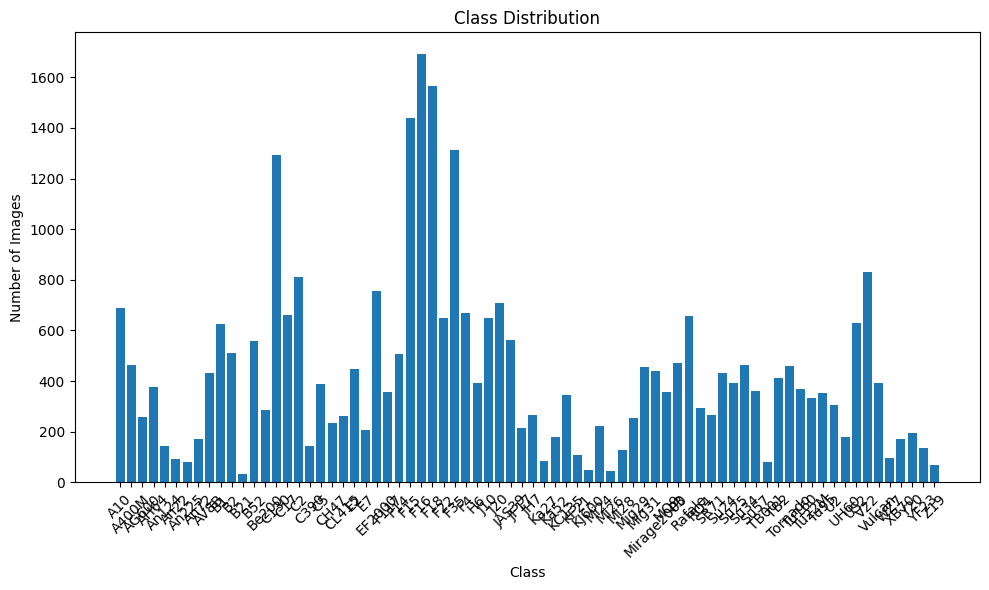

Mean: 431.31081081081084
Median: 365.5
Standard Deviation: 345.74580597207364
Min: 33
Max: 1693


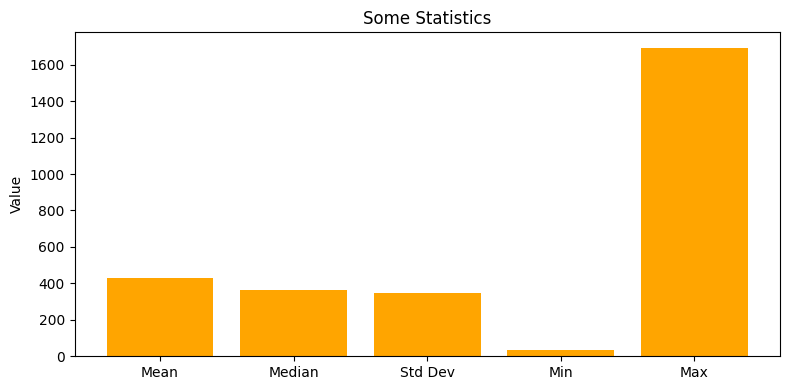

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

dataset_path = '../dataset/crop'
classes = os.listdir(dataset_path)
class_counts = {}

for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    if os.path.isdir(class_dir):
        class_counts[cls] = len(os.listdir(class_dir))


df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])

mean = df['Image Count'].mean()
median = df['Image Count'].median()
std_dev = df['Image Count'].std()
min_val = df['Image Count'].min()
max_val = df['Image Count'].max()

plt.figure(figsize=(10,6))
plt.bar(df['Class'], df['Image Count'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")

stats = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
values = [mean, median, std_dev, min_val, max_val]

plt.figure(figsize=(8,4))
plt.bar(stats, values, color='orange')
plt.title('Some Statistics')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

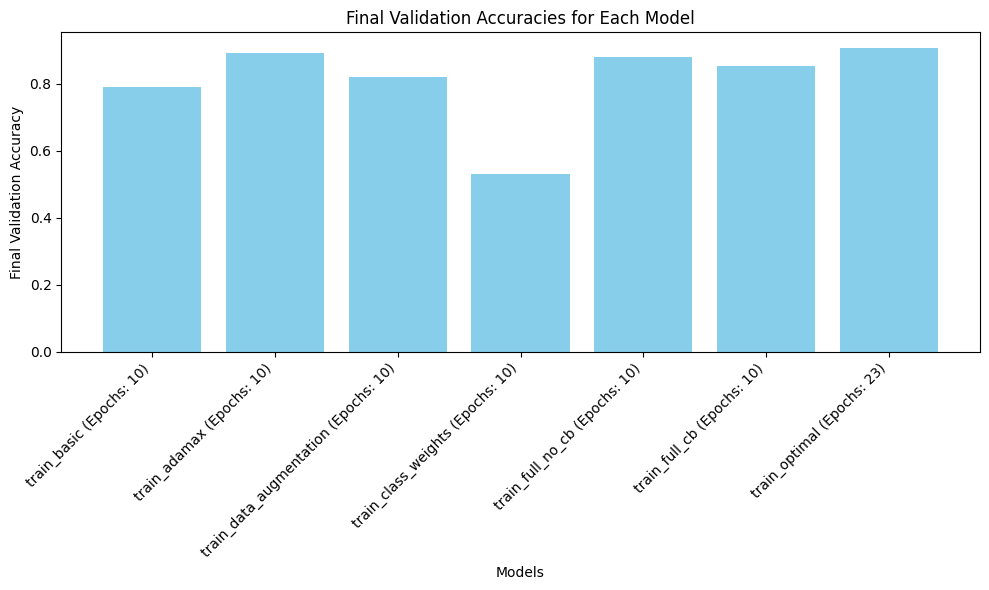

In [3]:
import json
import matplotlib.pyplot as plt

with open('./training_histories.json') as f:
    data = json.load(f)

models = []
final_val_accuracies = []
epoch_sizes = []
for model in data:
    models.append(model["Training Name"])
    final_val_accuracies.append(model["val_accuracy"][-1])
    epoch_sizes.append(len(model["val_accuracy"]))

labels = [f"{name} (Epochs: {epochs})" for name, epochs in zip(models, epoch_sizes)]

plt.figure(figsize=(10,6))
plt.bar(labels, final_val_accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Final Validation Accuracy')
plt.title('Final Validation Accuracies for Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()